# GPR Toy without hyperparameters_with_noise

The toy example we will be considering is again 
$$ f(x) = x*sin(x) + \epsilon$$

## GPR with given kernel and given number of data points.
- Let us generate n = 6 data points and see how our kernel function predicts. 
- Lets use kernel as 1*RBF(length_scale = 1, length_scale_bounds= [1e-5,1e5])

The GPR model when no HPO is  1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.1)


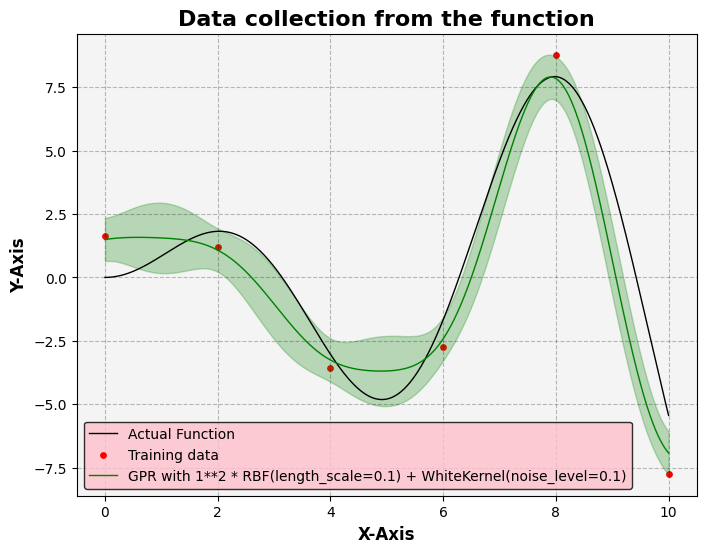

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# function definition
def my_func(x):
    y = x*np.sin(x)
    return y

# Plot function
x_plot = np.linspace(0,10,1000)
y_plot = my_func(x_plot)

# generate data for GPR
n = 6
x_train = np.linspace(0,10,n)
y_train = my_func(x_train) 

# Adding noise
np.random.seed(1)
noise = np.random.normal(loc=0, scale=1, size=n)

y_train = y_train + noise

# scaling the data for GPR
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
Scaler.fit(x_train.reshape(-1,1))
x_train_scaled = Scaler.transform(x_train.reshape(-1,1))

# Applying GPR with no Hyper parameter optimization
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel_RBF_noHPO = 1*RBF(length_scale = 1e-1, length_scale_bounds= [1e-5,1e5]) + WhiteKernel(noise_level=1e-1)
gpr_RBF_noHPO = GPR(kernel = kernel_RBF_noHPO, n_restarts_optimizer=1, optimizer=None, random_state=1)
#gp_RBF.max_iter_pred=100000
gpr_RBF_noHPO.fit(x_train_scaled,y_train)
gpr_RBF_noHPO_string = str(gpr_RBF_noHPO.kernel_)
print("The GPR model when no HPO is ", gpr_RBF_noHPO.kernel_)

# Evaluating the GPR prediction
x_test= np.linspace(0,10,1000)
x_test_scaled= Scaler.transform(x_test.reshape(-1,1))
y_test_mean_RBF_noHPO,y_test_std_RBF_noHPO= gpr_RBF_noHPO.predict(x_test_scaled,return_std=True)


# Visualization
fig,axs = plt.subplots(1,1,figsize=(8,6))
axs.set_xlabel("X-Axis", fontweight="bold", fontsize=12)
axs.set_ylabel("Y-Axis", fontweight="bold",fontsize=12)
axs.set_title("Data collection from the function", fontsize=16, fontweight="bold")

axs.plot(x_plot,y_plot, "k-",linewidth=1, label="Actual Function")
axs.scatter(x_train, y_train,color="r",s=15,label="Training data")
axs.plot(x_test,y_test_mean_RBF_noHPO,color = "green", linewidth=1, label= "GPR with " + gpr_RBF_noHPO_string)
axs.fill_between(x_test,
                y_test_mean_RBF_noHPO + 1.96* y_test_std_RBF_noHPO,
                y_test_mean_RBF_noHPO - 1.96* y_test_std_RBF_noHPO,
                color="green", alpha=0.25)

axs.set_facecolor("#f4f4f4")
axs.grid(True, alpha=0.25, color="black", linestyle="--")
legend=axs.legend(loc="best",facecolor="pink",edgecolor="black",fontsize=10)
legend.facecolor="pink"
legend.linewidth=2
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 1.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


The GPR model when no HPO is  5.5**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=1)


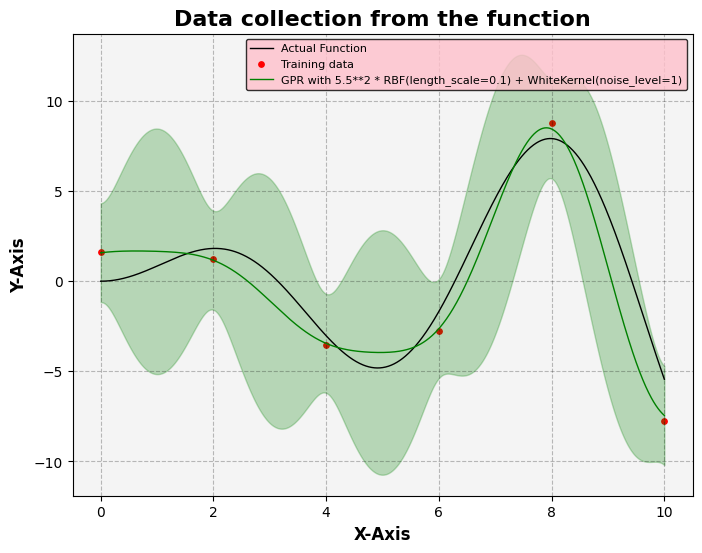

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# function definition
def my_func(x):
    y = x*np.sin(x)
    return y

# Plot function
x_plot = np.linspace(0,10,1000)
y_plot = my_func(x_plot)

# generate data for GPR
n = 6
x_train = np.linspace(0,10,n)
y_train = my_func(x_train) 

# Adding noise
np.random.seed(1)
noise = np.random.normal(loc=0, scale=1, size=n)

y_train = y_train + noise

# scaling the data for GPR
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
Scaler.fit(x_train.reshape(-1,1))
x_train_scaled = Scaler.transform(x_train.reshape(-1,1))

# Applying GPR with no Hyper parameter optimization
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel_RBF_noHPO = 1*RBF(length_scale = 1e-1, length_scale_bounds= [1e-1,1e5]) + WhiteKernel(noise_level=1e-1,noise_level_bounds=[1e-2,1e0])
gpr_RBF_noHPO = GPR(kernel = kernel_RBF_noHPO, n_restarts_optimizer=1, random_state=1)
#gp_RBF.max_iter_pred=100000
gpr_RBF_noHPO.fit(x_train_scaled,y_train)
gpr_RBF_noHPO_string = str(gpr_RBF_noHPO.kernel_)
print("The GPR model when no HPO is ", gpr_RBF_noHPO.kernel_)

# Evaluating the GPR prediction
x_test= np.linspace(0,10,1000)
x_test_scaled= Scaler.transform(x_test.reshape(-1,1))
y_test_mean_RBF_noHPO,y_test_std_RBF_noHPO= gpr_RBF_noHPO.predict(x_test_scaled,return_std=True)


# Visualization
fig,axs = plt.subplots(1,1,figsize=(8,6))
axs.set_xlabel("X-Axis", fontweight="bold", fontsize=12)
axs.set_ylabel("Y-Axis", fontweight="bold",fontsize=12)
axs.set_title("Data collection from the function", fontsize=16, fontweight="bold")

axs.plot(x_plot,y_plot, "k-",linewidth=1, label="Actual Function")
axs.scatter(x_train, y_train,color="r",s=15,label="Training data")
axs.plot(x_test,y_test_mean_RBF_noHPO,color = "green", linewidth=1, label= "GPR with " + gpr_RBF_noHPO_string)
axs.fill_between(x_test,
                y_test_mean_RBF_noHPO + 1.96* y_test_std_RBF_noHPO,
                y_test_mean_RBF_noHPO - 1.96* y_test_std_RBF_noHPO,
                color="green", alpha=0.25)

axs.set_facecolor("#f4f4f4")
axs.grid(True, alpha=0.25, color="black", linestyle="--")
legend=axs.legend(loc="best",facecolor="pink",edgecolor="black",fontsize=8)
legend.facecolor="pink"
legend.linewidth=2
plt.show()

## GPR with effect of changing the length parameter
- Let us generate n = 6 data points and see how our kernel function predicts. 
- Lets use the following kernels:
    - 1*RBF(length_scale = 1, length_scale_bounds= [1e-5,1e5])
    - 1*RBF(length_scale = 1e-1, length_scale_bounds= [1e-5,1e5])
    - 1*RBF(length_scale = 1e-2, length_scale_bounds= [1e-5,1e5])
    - 1*RBF(length_scale = 1e-3, length_scale_bounds= [1e-5,1e5])

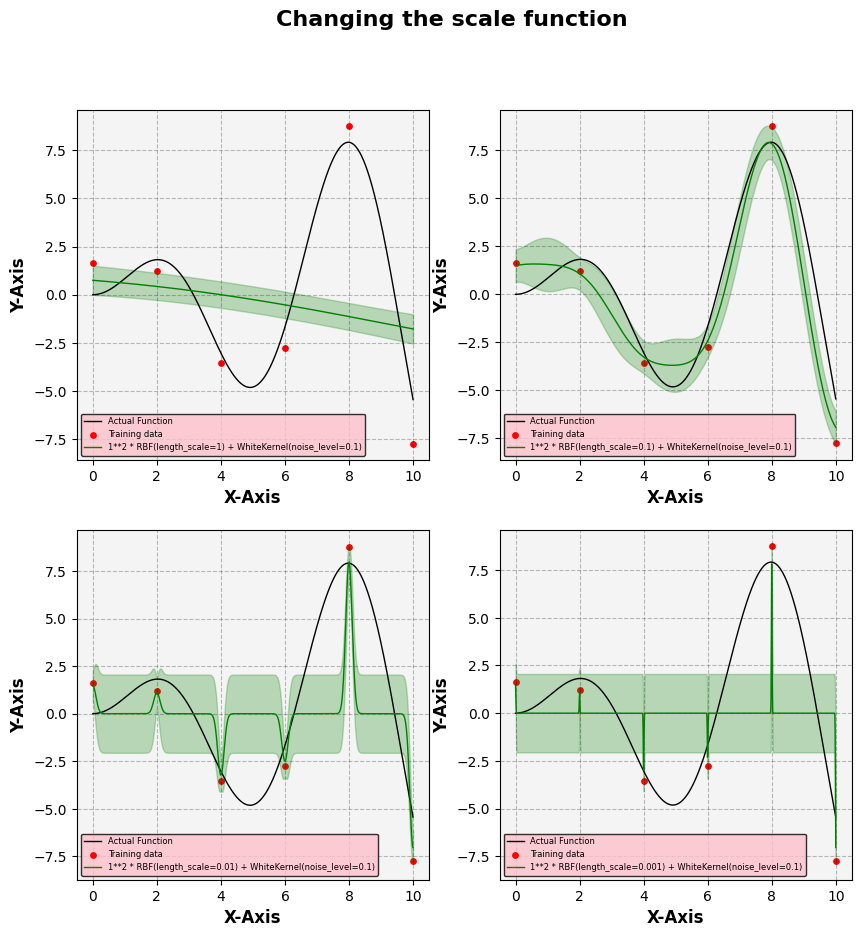

In [34]:
kernel_RBF_noHPO_list = [1*RBF(length_scale = 1, length_scale_bounds= [1e-5,1e5])+ WhiteKernel(noise_level=1e-1),
                        1*RBF(length_scale = 1e-1, length_scale_bounds= [1e-5,1e5])+ WhiteKernel(noise_level=1e-1),
                        1*RBF(length_scale = 1e-2, length_scale_bounds= [1e-5,1e5])+ WhiteKernel(noise_level=1e-1),
                        1*RBF(length_scale = 1e-3, length_scale_bounds= [1e-5,1e5])+ WhiteKernel(noise_level=1e-1)]

gpr_RBF_noHPO_list = [0,0,0,0]
gpr_RBF_noHPO_string_list = [0,0,0,0]
y_test_mean_RBF_noHPO_list = [0,0,0,0]
y_test_std_RBF_noHPO_list = [0,0,0,0]

i = 0
for kernel in kernel_RBF_noHPO_list:
    gpr_RBF_noHPO_list[i] =  GPR(kernel = kernel, n_restarts_optimizer=10, optimizer=None, random_state=1)
    #gp_RBF.max_iter_pred=100000
    gpr_RBF_noHPO_list[i].fit(x_train_scaled,y_train)
    gpr_RBF_noHPO_string_list[i] = str(gpr_RBF_noHPO_list[i].kernel_)
    y_test_mean_RBF_noHPO_list[i],y_test_std_RBF_noHPO_list[i] = gpr_RBF_noHPO_list[i].predict(x_test_scaled,return_std=True)
    i = i+1
    
# Visualization
i = 0
fig,axs = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Changing the scale function", fontweight="bold", fontsize=16)
for rows in [0,1]:
    for cols in [0,1]:
        plot_index = (rows,cols)
        axs[plot_index].set_xlabel("X-Axis", fontweight="bold", fontsize=12)
        axs[plot_index].set_ylabel("Y-Axis", fontweight="bold",fontsize=12)
        
        axs[plot_index].plot(x_plot,y_plot, "k-",linewidth=1, label="Actual Function")
        axs[plot_index].scatter(x_train, y_train,color="r",s=15,label="Training data")
        axs[plot_index].plot(x_test,y_test_mean_RBF_noHPO_list[i],color = "green",linestyle = "-", linewidth=1, label=  gpr_RBF_noHPO_string_list[i])
       
        axs[plot_index].fill_between(x_test,
                        y_test_mean_RBF_noHPO_list[i] + 1.96* y_test_std_RBF_noHPO_list[i],
                        y_test_mean_RBF_noHPO_list[i] - 1.96* y_test_std_RBF_noHPO_list[i],
                        color="green", alpha=0.25)

       
        axs[plot_index].set_facecolor("#f4f4f4")
        axs[plot_index].grid(True, alpha=0.25, color="black", linestyle="--")
        legend = axs[plot_index].legend(loc="best",facecolor="pink",edgecolor="black",fontsize=6)
        legend.facecolor="pink"
        legend.linewidth=2
        i = i+1
plt.show()


## GPR with effect of changing the scale parameter
- Let us generate n = 6 data points and see how our kernel function predicts. 
- Lets use the following kernels:
    - 10*RBF(length_scale = 1, length_scale_bounds= [1e-5,1e5])
    - 1*RBF(length_scale = 1, length_scale_bounds= [1e-5,1e5])
    - 1e-1*RBF(length_scale = 1, length_scale_bounds= [1e-5,1e5])
    - 1e-2*RBF(length_scale = 1, length_scale_bounds= [1e-5,1e5])